# Exploring Video Game Sales

This dataset contains a list of video games with sales greater than 100,000 copies.

In this project I will deal only with exploratory analysis, where the objective is to understand how the data is distributed and generate insight for future decision-making, this analysis aims to explore as much as possible the data in a simple, intuitive and informative way. The data used in this project contains information only from 1980 to 2016.


### Data information : 
Rank - Ranking of overall sales, integer

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.), object

Year - Year of the game's release, float

Genre - Genre of the game ,object

Publisher - Publisher of the game, object

NA_Sales - Sales in North America (in millions), float

EU_Sales - Sales in Europe (in millions), float

JP_Sales - Sales in Japan (in millions), float

Other_Sales - Sales in the rest of the world (in millions), float

Global_Sales - Total worldwide sales, float

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

## Read the data

In [3]:
data=pd.read_csv("vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Check for null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


## What genre games have been made the most?


## Which year had the most game releases?

Replicate from the previous code

## What are the top game genres produced for the years(5) with maximum game production?

In [7]:
max_gp=data.Year.value_counts().head()

In [15]:
year_filter=(data.loc[data.Year.isin(max_gp.index),['Year','Genre']].groupby(['Year','Genre']).Genre.count().unstack())
year_filter

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2007.0,211,84,50,151,42,66,86,103,85,90,167,67
2008.0,221,166,57,212,62,64,82,112,83,119,200,50
2009.0,272,141,53,207,29,79,84,103,91,123,184,65
2010.0,226,154,40,201,31,45,57,103,81,82,186,53
2011.0,239,108,50,184,37,43,65,95,94,56,122,46


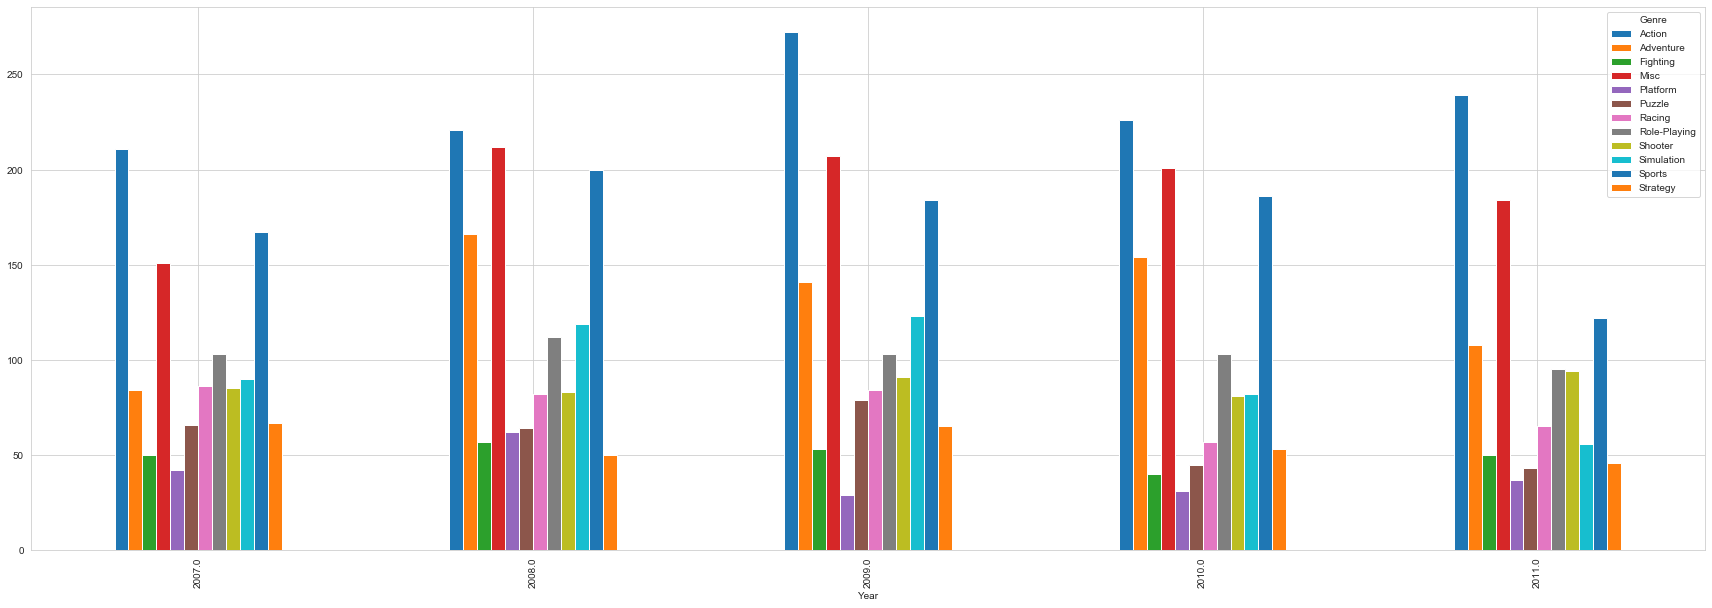

In [13]:
year_filter.plot.bar(figsize=(30,10))

Text(0.5, 1.0, 'Top Genre for last five years')

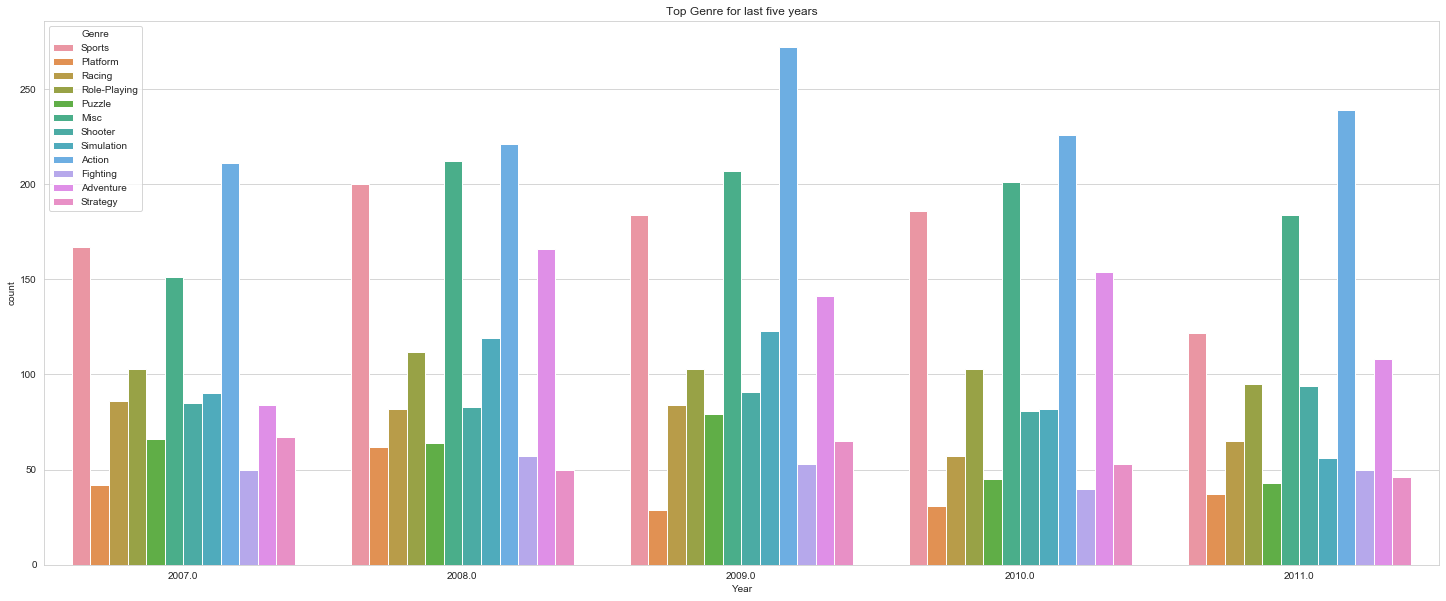

In [18]:
plt.figure(figsize=(25,10))
sns.countplot(x='Year',data=data,order=data.Year.value_counts().head(5).index.sort_values(),hue='Genre').set_title('Top Genre for last five years')

## Which genre game has sold the most in a single year?



In [21]:
sales_py=(data.groupby(['Year','Genre']).Global_Sales.sum().reset_index())


In [23]:
sales_py['Maxsales_py']=sales_py.groupby('Year').Global_Sales.transform(max)
sales_py

,Year,Genre,Global_Sales,Maxsales_py
0,1980.0,Action,0.34,7.07
1,1980.0,Fighting,0.77,7.07
2,1980.0,Misc,2.71,7.07
3,1980.0,Shooter,7.07,7.07
4,1980.0,Sports,0.49,7.07
5,1981.0,Action,14.84,14.84
6,1981.0,Platform,6.93,14.84
7,1981.0,Puzzle,2.24,14.84
8,1981.0,Racing,0.48,14.84
9,1981.0,Shooter,10.04,14.84


In [27]:
max_sales=sales_py.loc[sales_py.Global_Sales==sales_py.Maxsales_py].reset_index(drop=True)

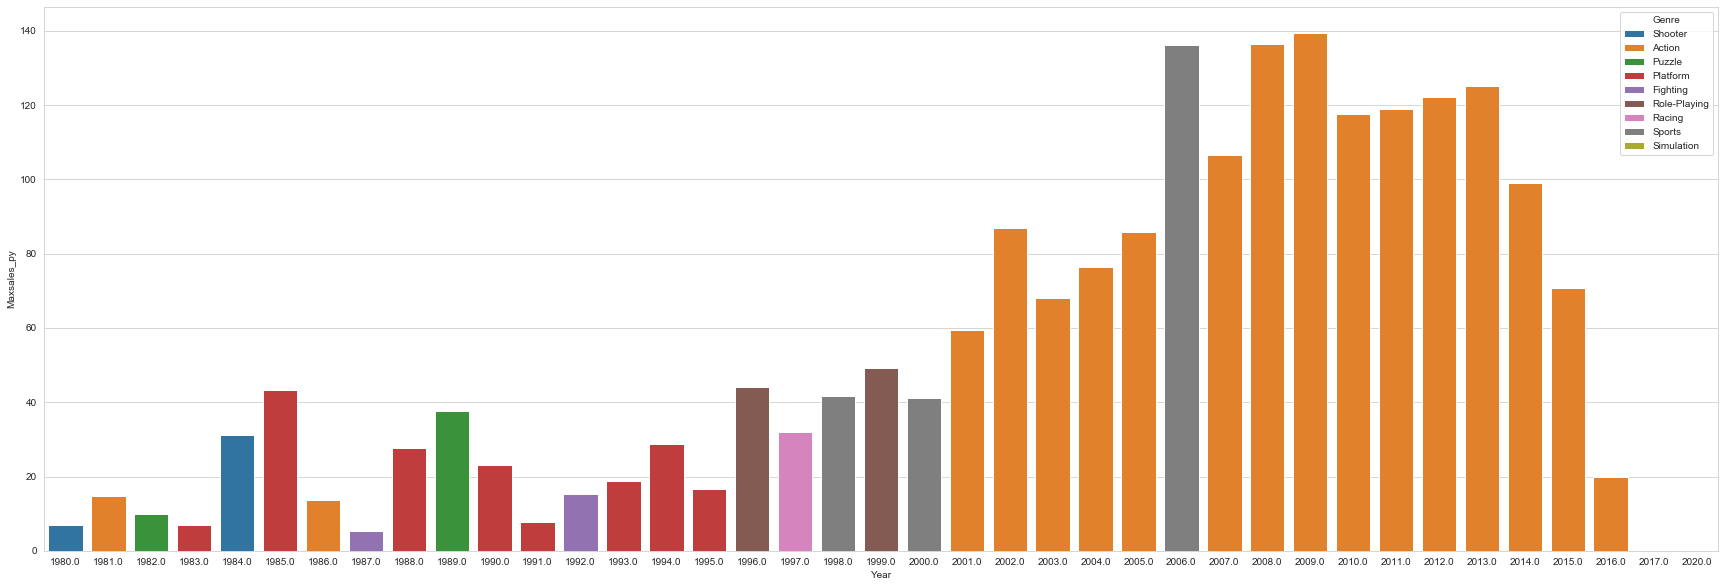

In [30]:
plt.figure(figsize=(30,10))
sns.barplot(x='Year',y='Maxsales_py',data=max_sales,hue='Genre',dodge=False)

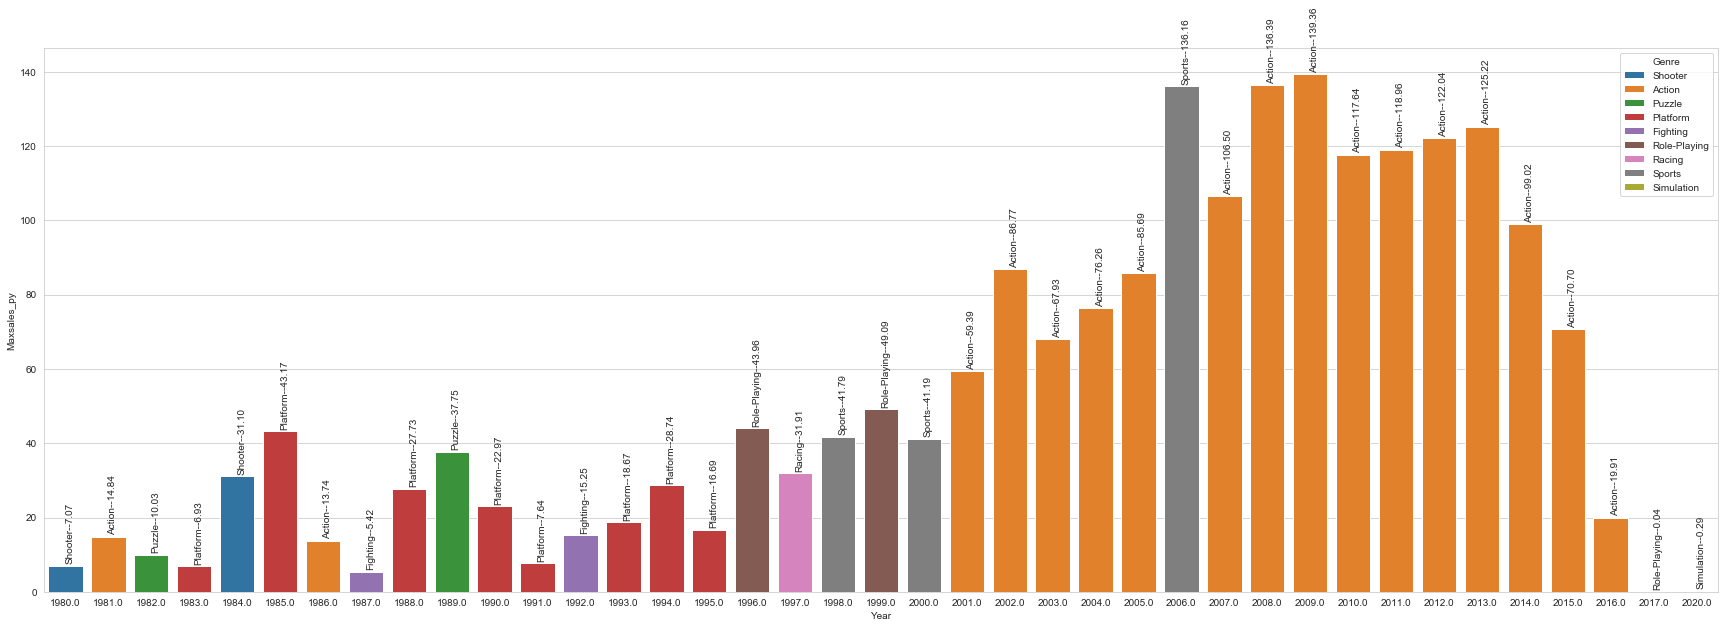

In [37]:
plt.figure(figsize=(30,10))
ax=sns.barplot(x='Year',y='Maxsales_py',data=max_sales,hue='Genre',dodge=False)

for index in range(0,max_sales.shape[0]):
    value=max_sales.Maxsales_py[index]
    genre=max_sales.Genre[index]
    ax.text(index,value+1,'{}--{:.2f}'.format(genre,value),rotation=90)

## Which platfrom have the highest sale price globally?

In [45]:
plat=(data.groupby("Platform").Global_Sales.sum().sort_values(ascending=False).reset_index())
plat.head()

,Platform,Global_Sales
0,PS2,1255.64
1,X360,979.96
2,PS3,957.84
3,Wii,926.71
4,DS,822.49


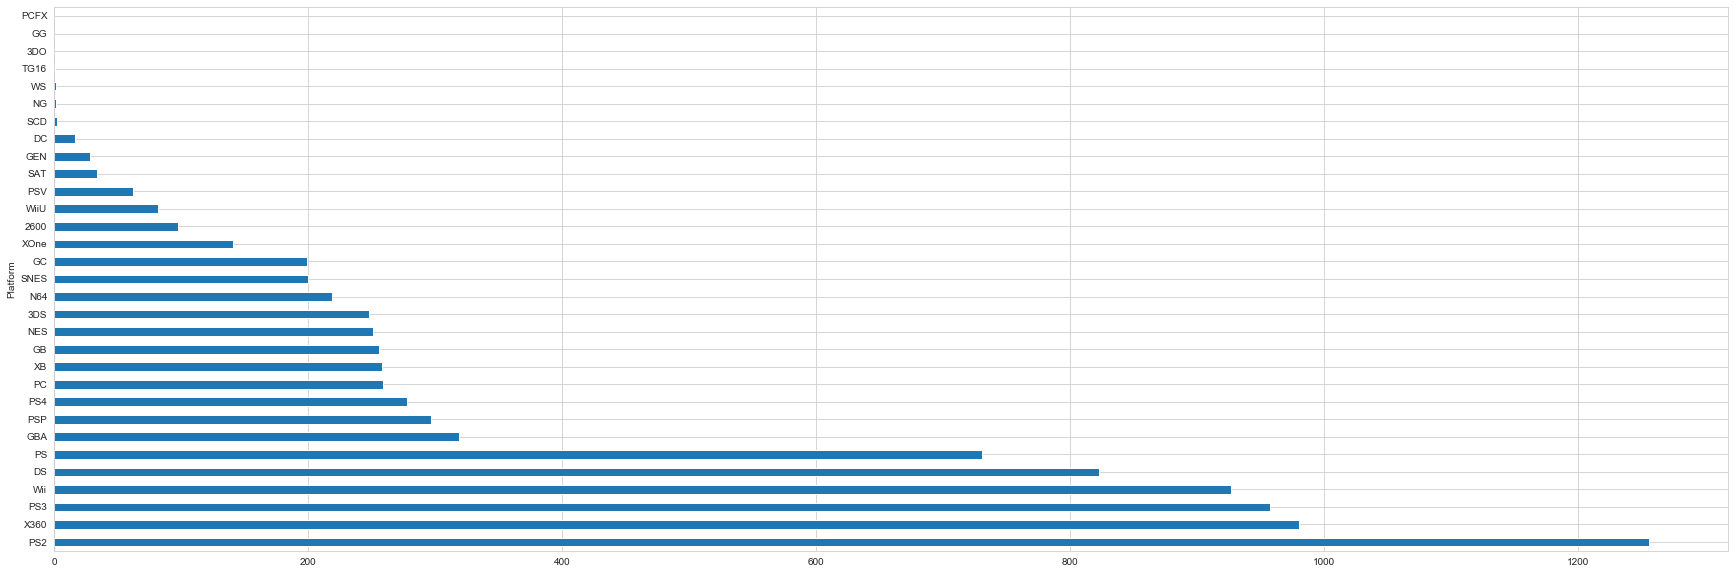

In [43]:
plt.figure(figsize=(30,10))
plat.plot.barh()

Text(0.5, 1.0, 'Global Platfrom sales')

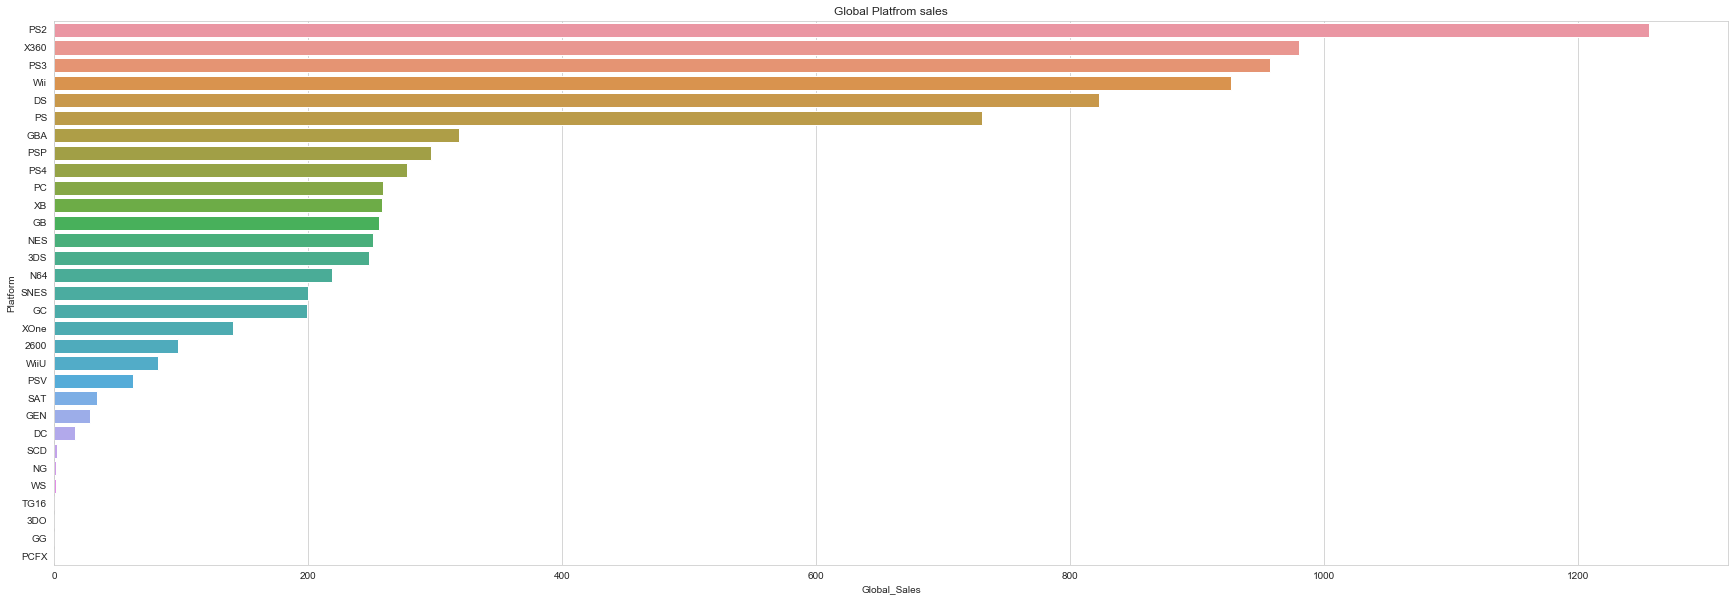

In [47]:
plt.figure(figsize=(30,10))
sns.barplot(x='Global_Sales',y='Platform',data=plat).set_title("Global Platfrom sales")

##  Which individual game have the highest sale price globally?

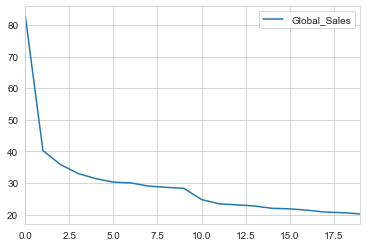

In [53]:
data[['Name','Global_Sales']].head(20).plot()#plot by default gives lne plot

#check if the vlues are in descending oreder and also check if one game has one roe only

In [55]:
data.Name.nunique()

11493

In [57]:
data.shape

(16598, 11)

In [58]:
data.Name.value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
Madden NFL 07                                        9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
LEGO Star Wars II: The Original Trilogy              8
The LEGO Movie Videogame                             8
FIFA 15                                              8
Madden NFL 08                                        8
Cars                                                 8
Angry Birds Star Wars                                8
LEGO Harry Potter: Years 5-7                         8
Lego Batman 3: Beyond Gotham                         8
Terraria                                             8
Monopoly                                             8
LEGO The Hobbit                                      8
FIFA Soccer 13                                       8
LEGO Jurassic World                                  8
Skylanders

In [61]:
game=data.groupby('Name').Global_Sales.sum().sort_values(ascending=False).reset_index()
game.head()

,Name,Global_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82


In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x='Global_Sales',y='Name',data=game)

## Find the total revenue by region

In [65]:
region=data.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().reset_index().rename(columns={'index':'region',0:'sales'}).set_index('region')
region.head()

,sales
region,
NA_Sales,4392.95
EU_Sales,2434.13
JP_Sales,1291.02
Other_Sales,797.75


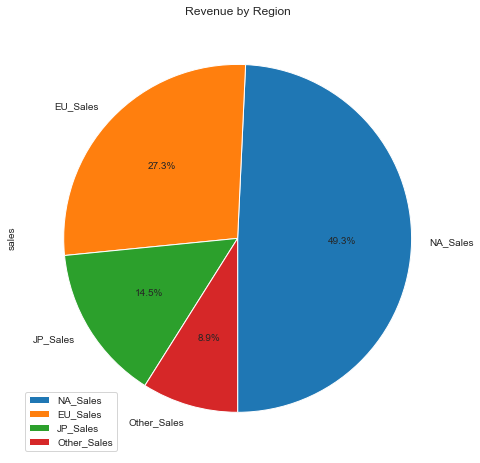

In [68]:
region.plot.pie(y='sales',figsize=(10,8),autopct='%.1f%%',title='Revenue by Region',startangle=270)


## What other questions you would want to get answered?

## What useful insights would you like to take to the stakeholders planning to come up with a new game?

## Take away activity : Understand the data more, complete the analysis keeping in mind the above business stakeholder question or any other and share your notebook on slack
